**FDA assignment 2**

Name: Hamza Memon

ERP: 26145

In [ ]:
import pandas as pd                   #the identification of needed libraries is done through GPT
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek


In [ ]:
# Load Dataset
df=pd.read_csv('/content/insurance_claims.csv')

In [ ]:
#visualization of data to understand it
df.head()



,PolicyholderNumber,FirstPartyVehicleNumber,PolicyholderOccupation,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyholderPostCode,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,PolicyHolderAge,...,ClaimInvolvedCovers,DamageImportance,ConnectionBetweenParties,LossPostCode,EasinessToStage,ClaimWithoutIdentifiedThirdParty,ClaimAmount,LossHour,NumberOfBodilyInjuries,Fraud
0,PH006844,V89073,Lawyer,2014-02-16,Motorcycle,75165,0,2,76,31,...,Liability,5,No,81328,0.652447,0,37246.774861,17,0,0.0
1,PH004230,V64262,Teacher,2011-09-14,Car,45809,1,1,97,67,...,Collision,8,No,88724,0.676261,0,32925.571674,19,1,0.0
2,PH004845,V91142,Business,2015-10-11,Truck,42165,0,1,176,76,...,Comprehensive,1,No,68441,0.851770,0,5817.983955,22,0,0.0
3,PH004688,V37222,Engineer,2016-04-12,Car,82232,0,1,151,71,...,Liability,9,No,44767,0.926641,0,48698.053138,22,0,0.0
4,PH006863,V57210,Business,2012-06-27,SUV,85642,0,1,81,28,...,Liability,8,No,46852,0.353562,0,38666.693932,4,0,0.0


In [ ]:
#now we need to drop columns that are irrelevant for the purpose of logistic regression
print("Column Names:", df.columns)
# Drop irrelevant columns
drop_cols = ['PolicyholderNumber', 'FirstPartyVehicleNumber', 'ReferenceId', 'ThirdPartyVehicleNumber', 'InsurerNotes', 'FirstPolicySubscriptionDate', 'LossDate']
df = df.drop(columns=drop_cols)

Column Names: Index(['PolicyholderNumber', 'FirstPartyVehicleNumber',
       'PolicyholderOccupation', 'FirstPolicySubscriptionDate',
       'FirstPartyVehicleType', 'PolicyholderPostCode',
       'PolicyWasSubscribedOnInternet', 'NumberOfPoliciesOfPolicyholder',
       'FpVehicleAgeMonths', 'PolicyHolderAge', 'FirstPartyLiability',
       'ReferenceId', 'ThirdPartyVehicleNumber', 'InsurerNotes', 'LossDate',
       'ClaimCause', 'ClaimInvolvedCovers', 'DamageImportance',
       'ConnectionBetweenParties', 'LossPostCode', 'EasinessToStage',
       'ClaimWithoutIdentifiedThirdParty', 'ClaimAmount', 'LossHour',
       'NumberOfBodilyInjuries', 'Fraud'],
      dtype='object')


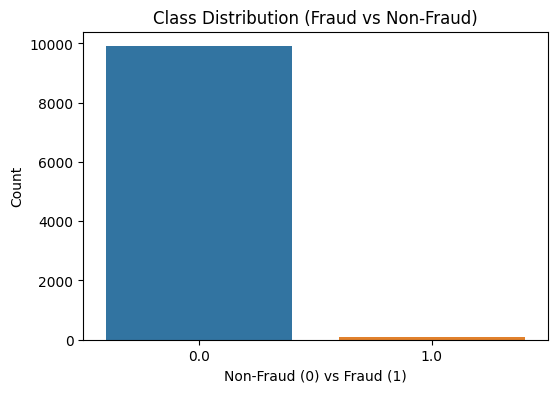

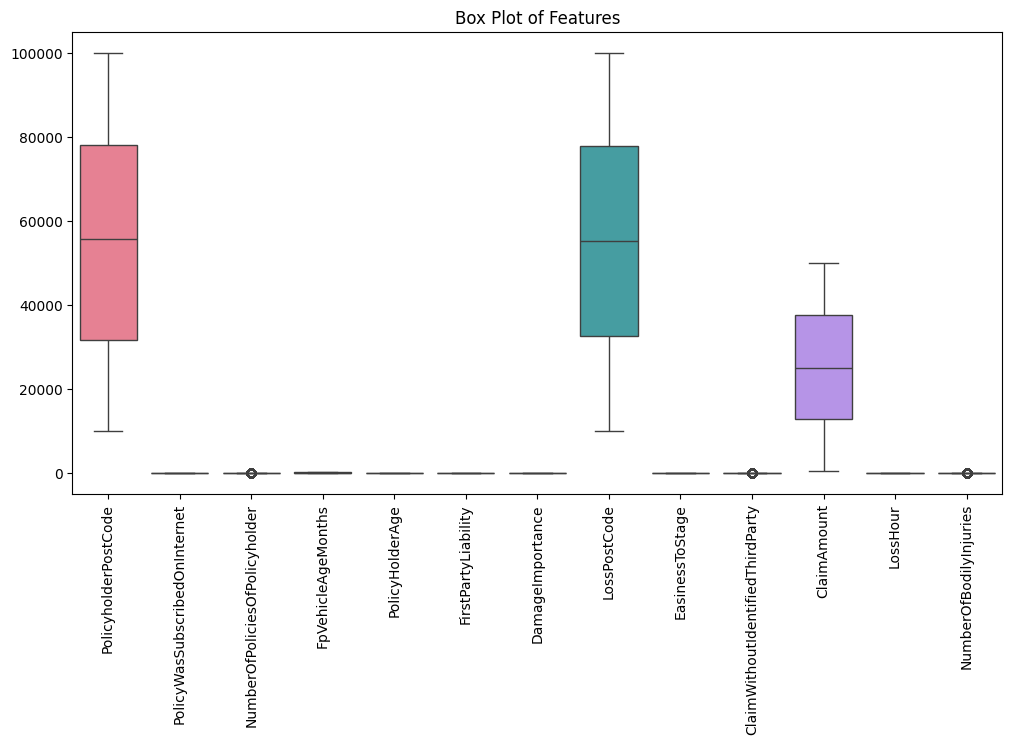

In [ ]:
# Class distribution plot (code generated through AI)
fraud_column = "Fraud"
df[fraud_column] = df[fraud_column].astype(str)
plt.figure(figsize=(6,4))
sns.countplot(x=df[fraud_column], hue=df[fraud_column], legend=False)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Non-Fraud (0) vs Fraud (1)")
plt.ylabel("Count")
plt.show()

#boxplot to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Fraud']))
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()

# Convert 'Fraud' column to numeric to be used in later codes (code generated through AI)
df['Fraud'] = pd.to_numeric(df['Fraud'], errors='coerce').astype(int)

In [ ]:
#we need to check if null values exist
print("null values:",df.isnull().sum() )
# Fill missing numerical values with the median (code generated through AI)
num_cols = ['PolicyholderPostCode', 'NumberOfPoliciesOfPolicyholder', 'FpVehicleAgeMonths', 'PolicyHolderAge', 'FirstPartyLiability', 'DamageImportance', 'LossPostCode', 'EasinessToStage', 'ClaimAmount', 'LossHour', 'NumberOfBodilyInjuries']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with the mode
cat_cols = ['PolicyholderOccupation', 'FirstPartyVehicleType', 'ClaimCause', 'ClaimInvolvedCovers', 'ConnectionBetweenParties']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

null values: PolicyholderOccupation              0
FirstPartyVehicleType               0
PolicyholderPostCode                0
PolicyWasSubscribedOnInternet       0
NumberOfPoliciesOfPolicyholder      0
FpVehicleAgeMonths                  0
PolicyHolderAge                     0
FirstPartyLiability                 0
ClaimCause                          0
ClaimInvolvedCovers                 0
DamageImportance                    0
ConnectionBetweenParties            0
LossPostCode                        0
EasinessToStage                     0
ClaimWithoutIdentifiedThirdParty    0
ClaimAmount                         0
LossHour                            0
NumberOfBodilyInjuries              0
Fraud                               0
dtype: int64


In [ ]:
#categorical values are not used in regression so we need to convert these categorical values to numerical ones(binary figures)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [ ]:
#seperate and identify ''x' and 'y' variables (codes are generated using AI)
X = df.drop(columns=['Fraud'])  # All columns except target
y = df['Fraud']   #dependent or target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
# since non fraud cases are a lot higher than fraud cases, it creates a class imbalance, we need to address this class imbalnce using SMOTE on the training data set
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) *old code that wasnt giving good result*
smote_tomek = SMOTETomek(random_state=42)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train, y_train)
#new code balances data better by oversampling fraud cases and removing redundant non fraud cases

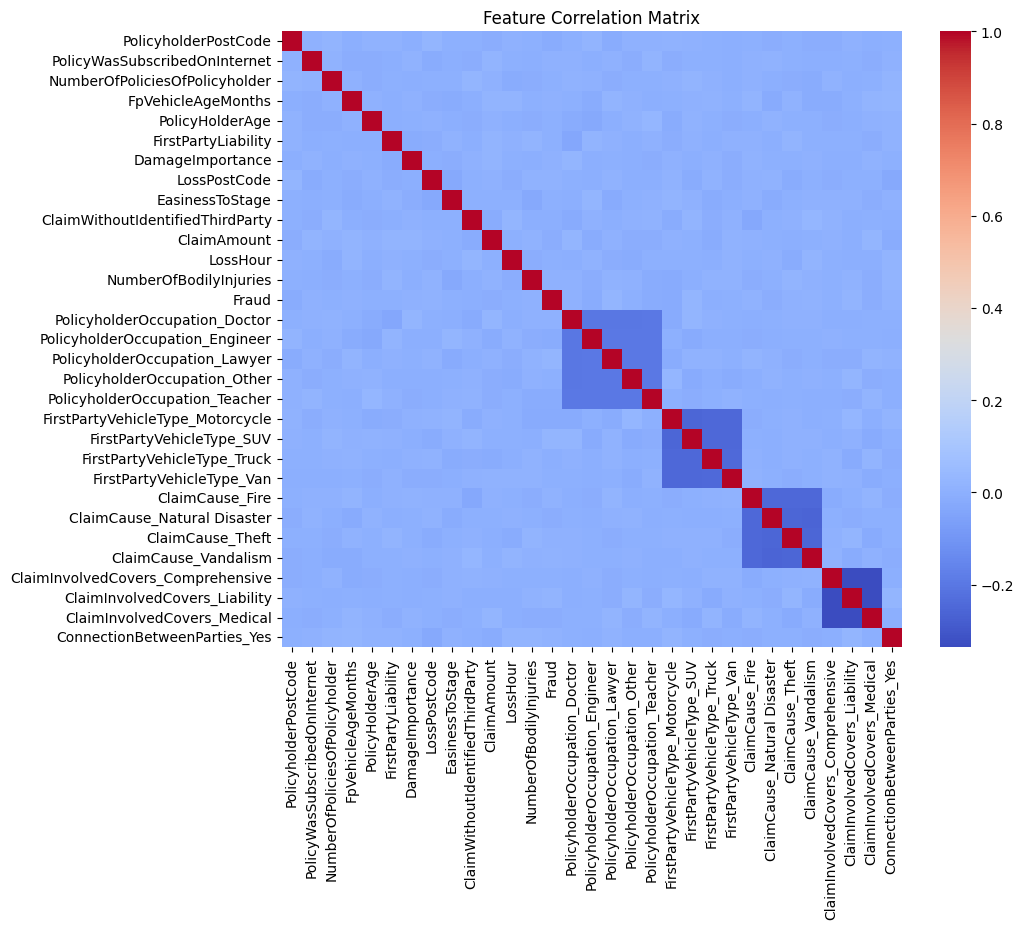

In [ ]:
#making correlation matrix to check for multicollinearity.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()
#the x variables donot seem to have multicollinearity so regularization not needed. However, if the model overfits during training(performs good on training but not on test data), we can apply regularization(old comment)

In [ ]:
#Scaling makes all features similar in size, so the model works better. (code generated using AI)
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression Model (code generated using AI)
#model = LogisticRegression(class_weight='balanced', random_state=42, penalty='l1', solver='liblinear', C=0.1)
#using regularization since without that the model was very weak (model is weak with this too)
log_reg = LogisticRegression(class_weight={0:1, 1:10}, random_state=42)  # Give more weight to fraud cases
log_reg.fit(X_train_scaled, y_train_smote)
#attempt to improve model by giving more weight to fraud cases to be able to catch them

LogisticRegression(class_weight={0: 1, 1: 10}, random_state=42)

In [ ]:
#changing the threshold because logistic regression would normally detect anything above 0.5% as fraud
threshold = 0.3   #lower threshhold will predict more cases to be fraud making it likely that it will actually catch a true fraud case
y_pred = (log_reg.predict_proba(X_test_scaled)[:,1] >= threshold).astype(int) # Changed 'model' to 'log_reg'
print("Classification report:",classification_report(y_test, y_pred))

print("Intercept:", log_reg.intercept_) # Changed 'model' to 'log_reg'
print("Coefficients:", log_reg.coef_) # Changed 'model' to 'log_reg'

Classification report:               precision    recall  f1-score   support

           0       0.99      0.69      0.81      1980
           1       0.01      0.20      0.01        20

    accuracy                           0.69      2000
   macro avg       0.50      0.45      0.41      2000
weighted avg       0.98      0.69      0.81      2000

Intercept: [1.68561837]
Coefficients: [[-0.35494027 -0.27157395 -0.24106967  0.05755807  0.30481392  0.18592773
  -0.10143432 -0.05037673  0.0388036  -0.37313895 -0.29111468  0.05541083
  -0.08521339 -0.6515353  -1.39320332 -0.76787279 -0.87754284 -1.24009355
  -1.10002142 -0.59850791 -0.91152405 -0.94326949 -0.6879242  -1.09210946
  -1.06932984 -0.68858294 -0.89579792 -0.8478447  -0.9267769  -0.29373643]]


Interpretation: the model is good at identifying non-fraud cases (99% precision, 69% recall) however, it fails to detect most fraud cases which is the main purpose of the model (20% recall). This means the model expects almost everything to be as non-fraud. The accuracy (69%) seems okay, but that is misleading because fraud cases are rare, and the model is not detecting them very well.

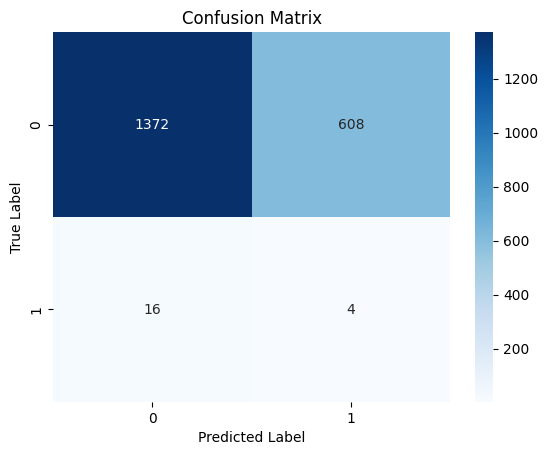

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

interpretation:

True negative: the model was able to predict 1372 cases to be non fraud and they were actually non fraud

false postive: the model predicted 608 cases to be a fraud when they actually weren't

true positive: the model wasonly able to identify 4 cases of actual fraud (this is an important factor)

false negative: this is the most important part of the confusion matrix and it wasnt able to do its job well since it detected 16 cases to be non fraud when in reality they did turn out to be fraud cases.

In [ ]:
# Get probability scores for class 1 (fraud)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]#generated through AI

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)   #generated through AI
print("AUC-ROC Score:", auc_score)
print("interpretation: the model correctly predicts fraud vs non fraud", auc_score*100 ,"%", "of the times")

AUC-ROC Score: 0.4236616161616162
interpretation: the model correctly predicts fraud vs non fraud 42.36616161616162 % of the times


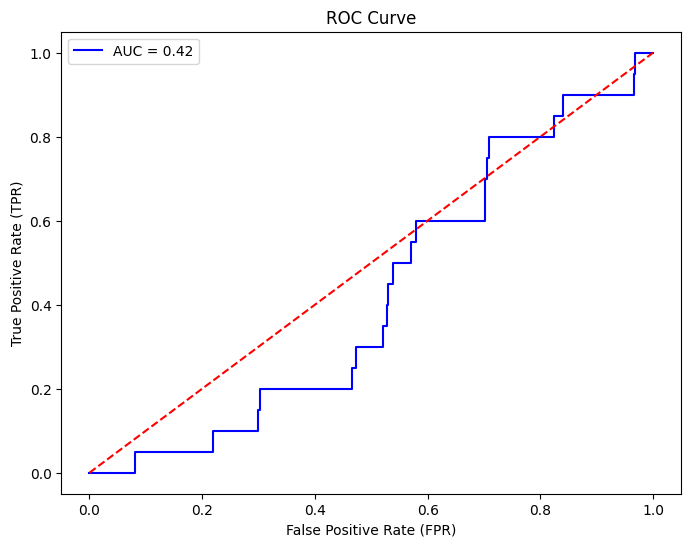

In [ ]:
# Plot ROC Curve(code generated through AI)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc_score), color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # Random guessing line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

This ROC curve shows that the model is performing worse than random guessing. The AUC score of 0.42 means that if we randomly picked a fraud and a non-fraud case, the model would correctly rank them only 42% of the time. This means that significant improvements are needed.

**Current performance of the model**
The model is good at identifying non-fraudulent claims but does not detect fraud. It predicts almost every case as "not fraud," which is why the accuracy looks high, but it's not useful for fraud detection. The AUC-ROC score of 0.43 is very low, meaning the model is worse than random guessing when it comes to identifying fraud. Since it never predicts fraud correctly, it needs significant improvements to be reliable.


**Ways to improve the model**



*   add more x variables that help and identify unusual circumstances that point towards fraud (like transaction frequency, sudden balance changes etc)
*   use something along with logistic regression to build a stronger model (something like random forest that works better for fraud detection)


**strengths of this model**

The model correctly identifies most of the normal (non-fraudulent) cases.



